In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# place where the dataset is parked
os.chdir('/home/azulin/Programming/2.Conferences/Meetup/Chinese Characters/data/chinese_char_csv')

In [3]:
# all_char.csv is the dataset with all the files
df = pd.read_csv('all_char.csv', index_col=[0])

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5128,5129,5130,5131,5132,5133,5134,char,type,order
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ad78,jinwen,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ad78,chuxi,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ad78,chuxi,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ad78,jinwen,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ad78,chuxi,1


In [5]:
X = df.iloc[:, :5135]

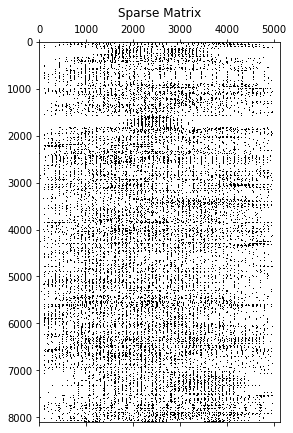

In [6]:
# matplotlib module to show a sparse matrix
plt.figure(figsize=(5,7))
plt.spy(X)
plt.title("Sparse Matrix");

In [7]:
# scipy convert the sparse matrix to dense matrix
from scipy.sparse import csr_matrix
sparse_X = csr_matrix(X)

Text(0.5,1,'Compression')

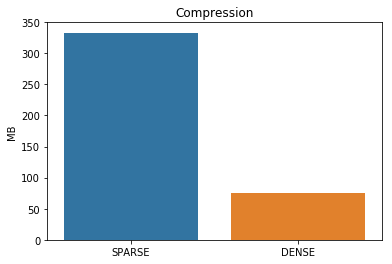

In [8]:
# we made a graph with seaborn sowing the difference between the sparse and the dense matrix
import seaborn as sns

dense_size = np.array(X).nbytes/1e6
sparse_size = (sparse_X.data.nbytes + sparse_X.indptr.nbytes + sparse_X.indices.nbytes)/1e6

sns.barplot(['SPARSE', 'DENSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')

In [9]:
y = df.loc[:, 'type']

In [10]:
y.shape

(8107,)

In [11]:
sparse_X.shape

(8107, 5135)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(sparse_X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [14]:
from sklearn import svm

In [15]:
svm_clf = svm.SVC(gamma=0.001, C=10.)

In [16]:
# Take around 5 minutes in data fitting
svm_clf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y[-1:]

62    chuxi
Name: type, dtype: object

In [18]:
svm_clf.predict(X[-1:])

array(['chuxi'], dtype=object)

In [19]:
# Take around 4 minutes in my machine
y_pred = svm_clf.predict(X_train)

In [20]:
from sklearn import metrics

In [21]:
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y_train, y_pred))

Accuracy : 1.0


In [22]:
print ("\nclassification report :\n", metrics.classification_report(y_train, y_pred))


classification report :
               precision    recall  f1-score   support

       chuxi       1.00      1.00      1.00      2787
      jinwen       1.00      1.00      1.00      2677
      oracle       1.00      1.00      1.00       120
   smallseal       1.00      1.00      1.00        90

   micro avg       1.00      1.00      1.00      5674
   macro avg       1.00      1.00      1.00      5674
weighted avg       1.00      1.00      1.00      5674



In [23]:
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,chuxi,jinwen,oracle,smallseal,All
True,,,,,
chuxi,2787,0,0,0,2787
jinwen,0,2677,0,0,2677
oracle,0,0,120,0,120
smallseal,0,0,0,90,90
All,2787,2677,120,90,5674


In [24]:
y_test_pred = svm_clf.predict(X_test)

In [25]:
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.5026715988491575


In [26]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,chuxi,jinwen,All
True,,,
chuxi,1221,0,1221
jinwen,1130,2,1132
oracle,50,0,50
smallseal,30,0,30
All,2431,2,2433


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf_KN = KNeighborsClassifier(n_neighbors=6)

In [43]:
clf_KN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [44]:
# Take around 4 minutes in my machine
y_pred_KN = clf_KN.predict(X_train)

In [45]:
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y_train, y_pred_KN))

Accuracy : 0.9113500176242509


In [46]:
pd.crosstab(y_train, y_pred_KN, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,chuxi,jinwen,oracle,smallseal,All
True,,,,,
chuxi,2653,134,0,0,2787
jinwen,165,2512,0,0,2677
oracle,8,109,3,0,120
smallseal,3,84,0,3,90
All,2829,2839,3,3,5674


In [47]:
y_test_pred_KN = clf_KN.predict(X_test)

In [48]:
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y_test, y_test_pred_KN))

Accuracy : 0.8877928483353884


In [49]:
pd.crosstab(y_test, y_test_pred_KN, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,chuxi,jinwen,smallseal,All
True,,,,
chuxi,1119,102,0,1221
jinwen,89,1041,2,1132
oracle,3,47,0,50
smallseal,2,28,0,30
All,1213,1218,2,2433


In [50]:
print ("\nclassification report :\n", metrics.classification_report(y_test, y_test_pred_KN))


classification report :
               precision    recall  f1-score   support

       chuxi       0.92      0.92      0.92      1221
      jinwen       0.85      0.92      0.89      1132
      oracle       0.00      0.00      0.00        50
   smallseal       0.00      0.00      0.00        30

   micro avg       0.89      0.89      0.89      2433
   macro avg       0.44      0.46      0.45      2433
weighted avg       0.86      0.89      0.87      2433



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn import tree

In [ ]:
tree_clf = tree.DecisionTreeClassifier()

In [ ]:
tree_clf = tree_clf.fit(X_train, y_train)

In [ ]:
tree_clf.predict(X[-1:])

In [ ]:
# Take around 4 minutes in my machine
y_pred = tree_clf.predict(X_train)

In [ ]:
y_pred.shape

In [ ]:
y_train.shape

In [ ]:
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y_train, y_pred))

In [ ]:
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Take around 4 minutes in my machine
y_pred = tree_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
print ("Accuracy :", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [ ]:
ovr_clf = OneVsRestClassifier(LinearSVC(C=100.)).fit(X_train, y_train)

In [ ]:
y_pred = ovr_clf.predict(X_test)

In [ ]:
print ("Accuracy :", metrics.accuracy_score(y_test, y_pred))

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Build a Random Forest classifier

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Build a Random Forest classifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
classifier.get_params()

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=3)

In [ ]:
print("Accuracy of the classifier: " + str(round(100*accuracy.mean(), 2)) + "%")

In [ ]:
y_pred = classifier.predict(X_train)

In [ ]:
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# Validation curves
from sklearn.model_selection import validation_curve

In [ ]:
classifier = RandomForestClassifier(max_depth=4, random_state=7)

In [ ]:
parameter_grid = np.linspace(25, 200, 8).astype(int)

In [ ]:
train_scores, validation_scores = validation_curve(classifier, X_train, y_train, 
                                                   "n_estimators", 
                                                   parameter_grid, 
                                                   cv=5)

In [ ]:
print("\n##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

In [ ]:
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
parameter_grid = np.linspace(2, 10, 5).astype(int)

In [ ]:
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
train_scores, validation_scores = validation_curve(classifier, X_train, y_train, 
                                                   "n_estimators", 
                                                   parameter_grid, 
                                                   cv=5)
print("\n##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

In [ ]:
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set the parameters by cross-validation
parameter_grid = [ {'kernel': ['linear'], 'C': [1, 10, 50, 600]},
                   {'kernel': ['poly'], 'degree': [2, 3]},
                   {'kernel': ['rbf'], 'gamma': [0.01, 0.001], 'C': [1, 10, 50, 600]},]

In [ ]:
metrics = ['precision', 'recall_weighted']

In [ ]:
for metric in metrics:
    print("\n#### Searching optimal hyperparameters for", metric)
    classifier = grid_search.GridSearchCV(svm.SVC(C=1), 
                                          parameter_grid, 
                                          cv=5, 
                                          scoring=metric)
    classifier.fit(X_train, y_train)